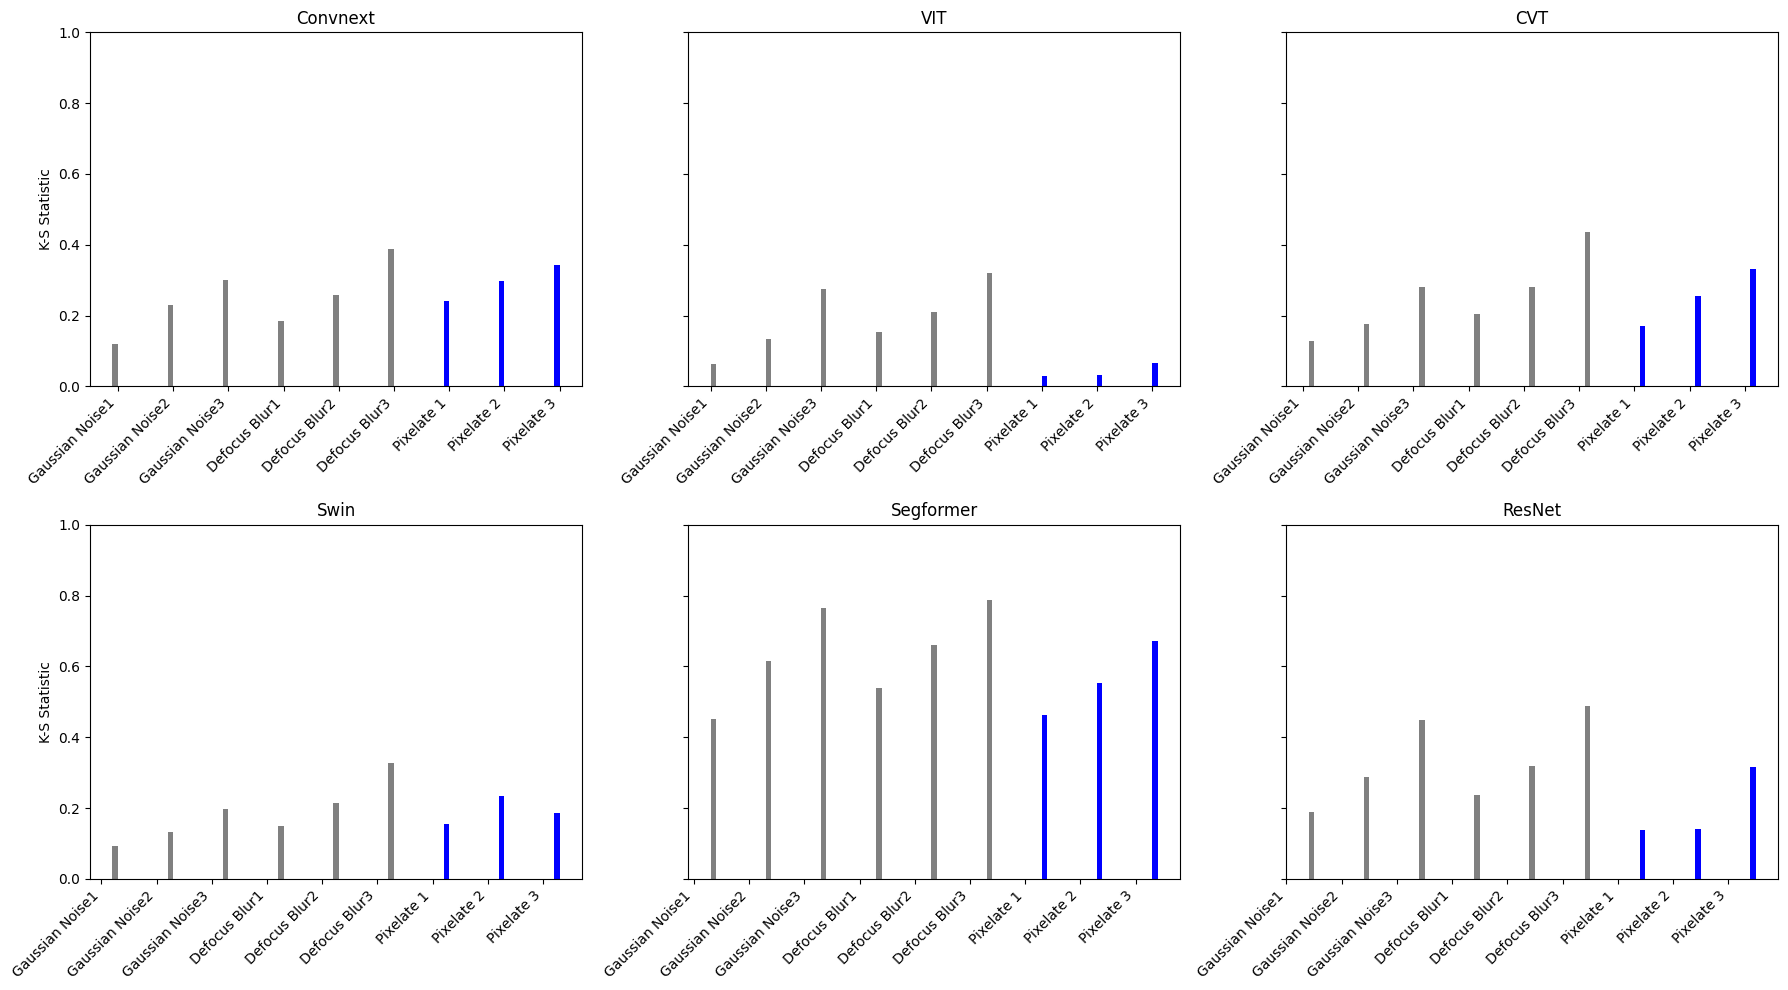

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
models = ["Convnext", "VIT", "CVT", "Swin", "Segformer", "ResNet"]
perturbations = ["Gaussian Noise1", "Gaussian Noise2", "Gaussian Noise3",
                 "Defocus Blur1", "Defocus Blur2", "Defocus Blur3",
                 "Pixelate 1", "Pixelate 2", "Pixelate 3"]
# 为不同类型的扰动设置颜色
color_map = {"Gaussian Noise": "red", "Defocus Blur": "green", "Pixelate": "blue"}
data = np.array([
    [0.1195, 0.0628, 0.1285, 0.0930, 0.4518, 0.1892],
    [0.2305, 0.1330, 0.1767, 0.1314, 0.6141, 0.2891],
    [0.2998, 0.2762, 0.2820, 0.1983, 0.7644, 0.4483],
    [0.1845, 0.1543, 0.2047, 0.1499, 0.5405, 0.2374],
    [0.2592, 0.2091, 0.2797, 0.2142, 0.6598, 0.3181],
    [0.3886, 0.3205, 0.4371, 0.3274, 0.7891, 0.4882],
    [0.2410, 0.0287, 0.1697, 0.1543, 0.4632, 0.1384],
    [0.2983, 0.0325, 0.2564, 0.2329, 0.5537, 0.1413],
    [0.3421, 0.0647, 0.3307, 0.1865, 0.6716, 0.3170]
])

# 创建面板网格
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)

# 为每个模型绘制条形图
bar_width = 0.1
for i, ax in enumerate(axes.flatten()):
    if i < len(models):  # 防止模型数量不足以填满网格
        for j, perturbation in enumerate(perturbations):
            # 根据扰动类型确定颜色
            perturbation_type = perturbation.split(' ')[0]
            color = color_map.get(perturbation_type, "gray")
            ax.bar(j + bar_width * i, data[j, i], bar_width, color=color)
        ax.set_title(models[i])
        ax.set_xticks(np.arange(len(perturbations)) + bar_width / 2)
        ax.set_xticklabels(perturbations, rotation=45, ha='right')
        ax.set_ylim(0, 1)  # 设置Y轴的范围
        if i % 3 == 0:
            ax.set_ylabel('K-S Statistic')

plt.tight_layout()
plt.show()


NameError: name 'colors' is not defined

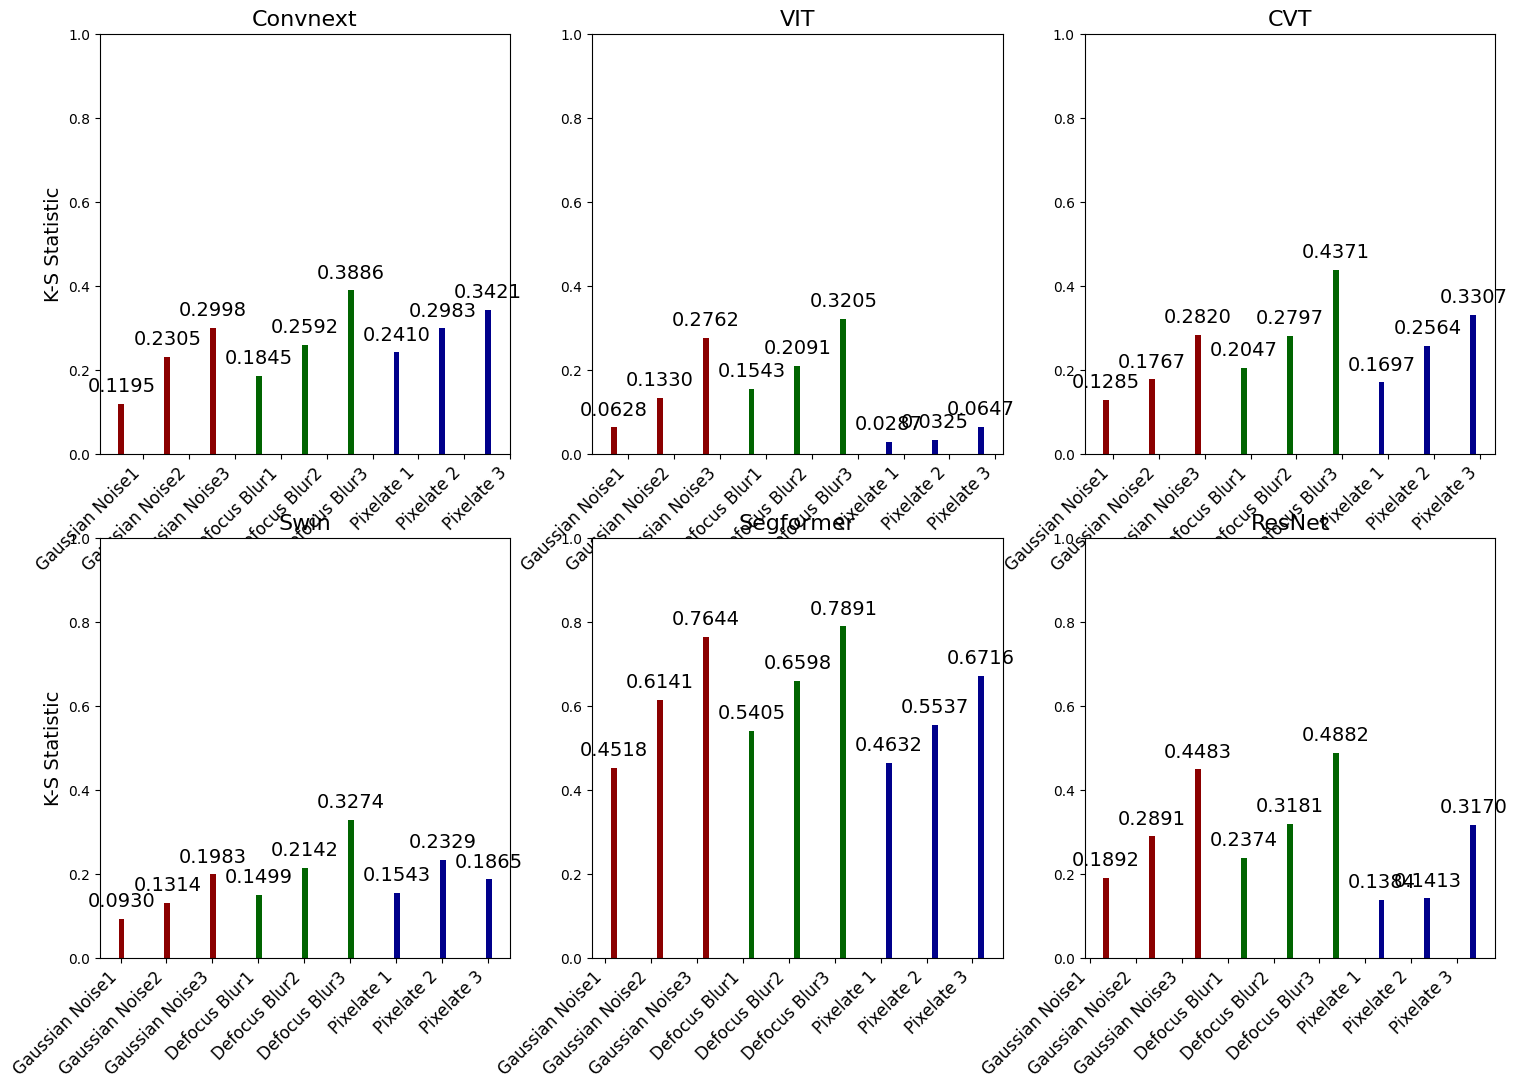

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
models = ["Convnext", "VIT", "CVT", "Swin", "Segformer", "ResNet"]
perturbations = ["Gaussian Noise1", "Gaussian Noise2", "Gaussian Noise3",
                 "Defocus Blur1", "Defocus Blur2", "Defocus Blur3",
                 "Pixelate 1", "Pixelate 2", "Pixelate 3"]
# 为不同类型的扰动设置颜色

data = np.array([
    [0.1195, 0.0628, 0.1285, 0.0930, 0.4518, 0.1892],
    [0.2305, 0.1330, 0.1767, 0.1314, 0.6141, 0.2891],
    [0.2998, 0.2762, 0.2820, 0.1983, 0.7644, 0.4483],
    [0.1845, 0.1543, 0.2047, 0.1499, 0.5405, 0.2374],
    [0.2592, 0.2091, 0.2797, 0.2142, 0.6598, 0.3181],
    [0.3886, 0.3205, 0.4371, 0.3274, 0.7891, 0.4882],
    [0.2410, 0.0287, 0.1697, 0.1543, 0.4632, 0.1384],
    [0.2983, 0.0325, 0.2564, 0.2329, 0.5537, 0.1413],
    [0.3421, 0.0647, 0.3307, 0.1865, 0.6716, 0.3170]
])


color_map = {
    "Gaussian Noise": "darkred",
    "Defocus Blur": "darkgreen",
    "Pixelate": "darkblue"
}

perturbation_types = ["Gaussian Noise", "Defocus Blur", "Pixelate"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # 调整整体布局尺寸

# 计算每个模型的柱子组的起始位置
group_width = len(models) * bar_width + (len(models) - 1) * spacing
start_positions = np.arange(len(perturbations)) * (group_width + spacing)

for i, ax in enumerate(axes.flatten()):
    if i < len(models):
        for j, perturbation in enumerate(perturbations):
            # 确定扰动类型，并正确分配颜色
            for pt in perturbation_types:
                if pt in perturbation:
                    perturbation_type = pt
                    break
            color = color_map.get(perturbation_type, "gray")
            # 计算每个柱子的位置
            bar_position = start_positions[j] + (bar_width + spacing) * i
            ax.bar(bar_position, data[j, i], bar_width, color=color)
            # 添加数据标签
            ax.text(bar_position, data[j, i] + 0.02, f'{data[j, i]:.4f}', 
                    ha='center', va='bottom', fontsize=font_size)
        ax.set_title(models[i], fontsize=title_size)
        ax.set_xticks(start_positions + group_width / 2)
        ax.set_xticklabels(perturbations, rotation=45, ha='right', fontsize=tick_size)
        ax.set_ylim(0, 1)  # 设置Y轴的范围
        if i % 3 == 0:
            ax.set_ylabel('K-S Statistic', fontsize=label_size)

# 添加图例
plt.figlegend([plt.Rectangle((0,0),1,1, color=color) for color in colors], perturbation_types, loc='lower center', 
              ncol=3, fontsize=label_size)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Comparison of Model Robustness to Different Perturbations", fontsize=16)
plt.show()

# 打印出关键参数以便于手动调整
print("Bar width:", bar_width)
print("Spacing between bars:", spacing)
print("X-axis tick positions:", start_positions + group_width / 2)


NameError: name 'colors' is not defined

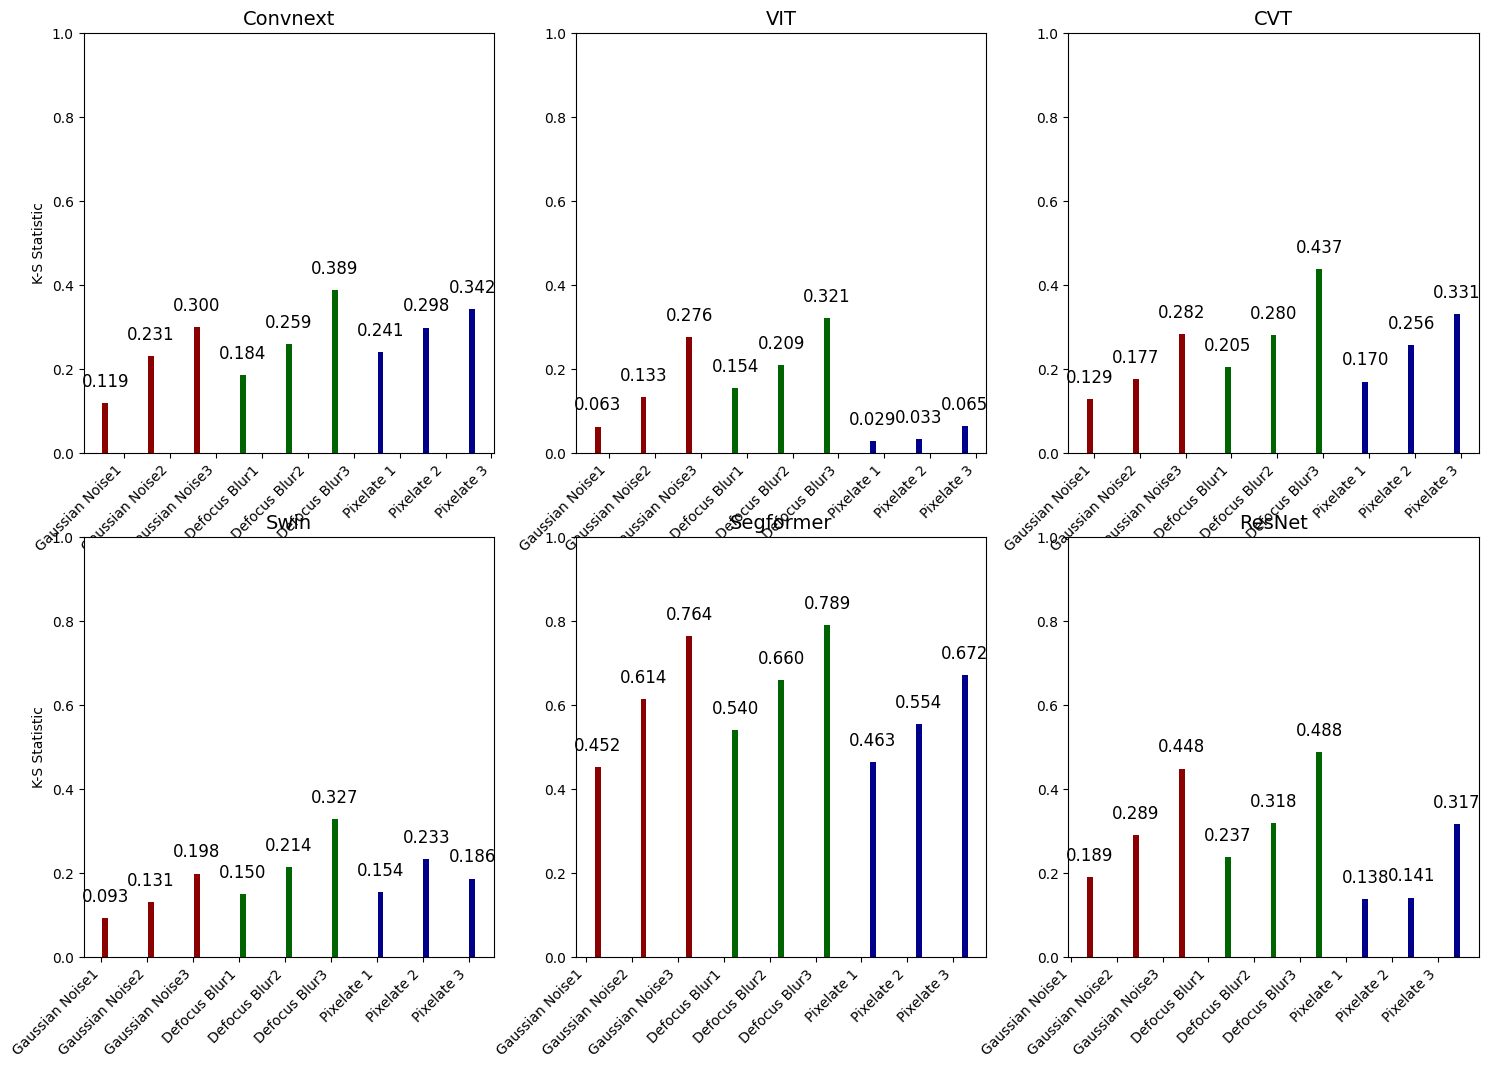

In [9]:
# 定义所需的变量和颜色映射
models = ["Convnext", "VIT", "CVT", "Swin", "Segformer", "ResNet"]
perturbations = ["Gaussian Noise1", "Gaussian Noise2", "Gaussian Noise3",
                 "Defocus Blur1", "Defocus Blur2", "Defocus Blur3",
                 "Pixelate 1", "Pixelate 2", "Pixelate 3"]
color_map = {
    "Gaussian Noise": "darkred",
    "Defocus Blur": "darkgreen",
    "Pixelate": "darkblue"
}
perturbation_types = ["Gaussian Noise", "Defocus Blur", "Pixelate"]

# 调整代码以确保每个柱子下面都有对应的label，且X轴上的标记与柱子对应，两行整齐

# 创建正方形的子图
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # 调整整体布局尺寸

# 减少柱子之间的间距并且增加宽度，确保对齐
bar_width = 0.1
spacing = 0.03  # 间距调整

# 计算每个模型的柱子组的起始位置
group_width = len(models) * bar_width + (len(models) - 1) * spacing
start_positions = np.arange(len(perturbations)) * (group_width + spacing)

# 设置字体大小
font_size = 12
title_size = 14
label_size = 10
tick_size = 10

for row, ax_row in enumerate(axes):
    for col, ax in enumerate(ax_row):
        model_index = row * 3 + col
        if model_index < len(models):
            for j, perturbation in enumerate(perturbations):
                # 确定扰动类型，并正确分配颜色
                for pt in perturbation_types:
                    if pt in perturbation:
                        perturbation_type = pt
                        break
                color = color_map.get(perturbation_type, "gray")
                # 计算每个柱子的位置
                bar_position = start_positions[j] + (bar_width + spacing) * model_index
                ax.bar(bar_position, data[j, model_index], bar_width, color=color)
                # 添加数据标签
                ax.text(bar_position, data[j, model_index] + 0.03, f'{data[j, model_index]:.3f}', 
                        ha='center', va='bottom', fontsize=font_size)
            ax.set_title(models[model_index], fontsize=title_size)
            ax.set_xticks(start_positions + (group_width - bar_width) / 2)
            ax.set_xticklabels(perturbations, rotation=45, ha='right', fontsize=tick_size)
            ax.set_ylim(0, 1)  # 设置Y轴的范围
            if col == 0:
                ax.set_ylabel('K-S Statistic', fontsize=label_size)

# 添加图例
plt.figlegend([plt.Rectangle((0,0),1,1, color=color) for color in colors], perturbation_types, loc='lower center', 
              ncol=3, fontsize=label_size)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Comparison of Model Robustness to Different Perturbations", fontsize=16)
plt.show()

# 打印出关键参数以便于手动调整
print("Bar width:", bar_width)
print("Spacing between bars:", spacing)
print("X-axis tick positions:", start_positions + (group_width - bar_width) / 2)




NameError: name 'label_weight' is not defined

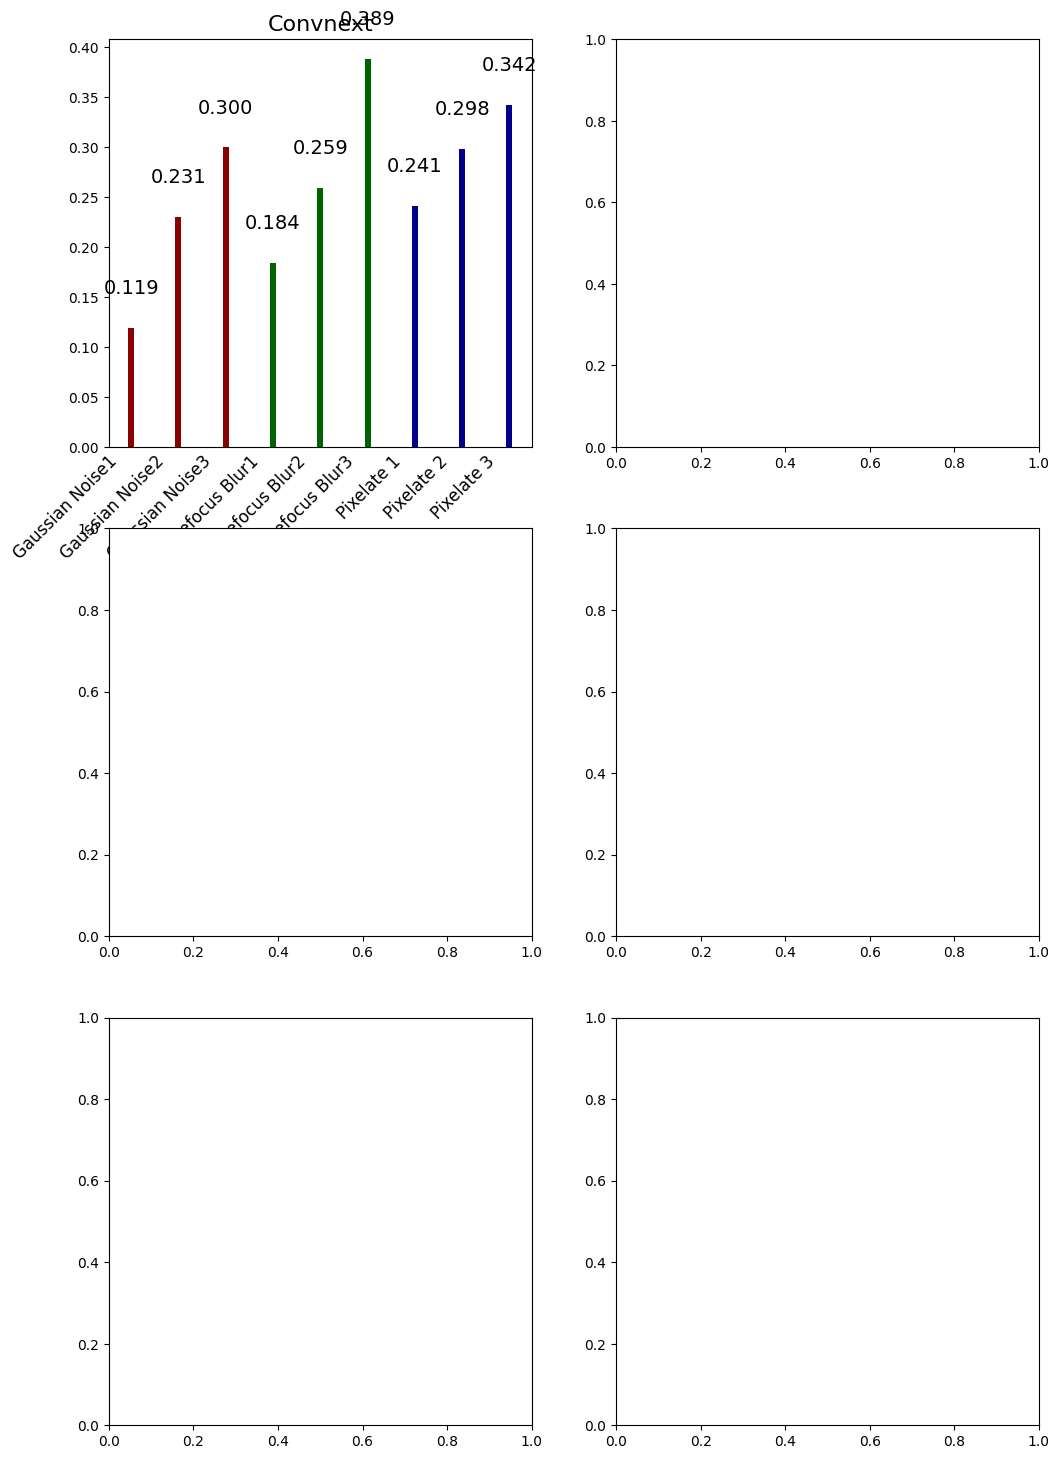

In [10]:
# 修改图表以去掉大标题，加粗加大X、Y轴标签文字和数字，X轴去掉刻度点

# 创建三行两列的子图
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# 设置字体大小和样式
font_size = 14  # 数据标签字体大小
title_size = 16  # 子图标题字体大小
label_size = 14  # X、Y轴标签字体大小
tick_size = 12  # 刻度标签字体大小


for row, ax_row in enumerate(axes):
    for col, ax in enumerate(ax_row):
        model_index = row * 2 + col
        if model_index < len(models):
            for j, perturbation in enumerate(perturbations):
                # 确定扰动类型，并正确分配颜色
                for pt in perturbation_types:
                    if pt in perturbation:
                        perturbation_type = pt
                        break
                color = color_map.get(perturbation_type, "gray")
                # 计算每个柱子的位置
                bar_position = start_positions[j] + (bar_width + spacing) * model_index
                ax.bar(bar_position, data[j, model_index], bar_width, color=color)
                # 添加数据标签
                ax.text(bar_position, data[j, model_index] + 0.03, f'{data[j, model_index]:.3f}', 
                        ha='center', va='bottom', fontsize=font_size)
            ax.set_title(models[model_index], fontsize=title_size)
            # 设置X轴刻度位置
            if row == 0:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 - 0.5)
            elif row == 1:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 +0.2)
            else:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 + 0.9)
            ax.set_xticklabels(perturbations, rotation=45, ha='right', fontsize=tick_size)
            ax.tick_params(axis='x', length=0)  # 去掉X轴的刻度点
            ax.set_ylabel('K-S Statistic', fontsize=label_size, weight=label_weight)
            ax.set_ylim(0, 1)  # 设置Y轴的范围

# 添加图例
plt.figlegend([plt.Rectangle((0,0),1,1, color=color) for color in colors], perturbation_types, loc='lower center', 
              ncol=3, fontsize=label_size)

plt.tight_layout(rect=[0, 0.02, 1, 0.95])
plt.show()

# 打印出关键参数以便于手动调整
print("Bar width:", bar_width)
print("Spacing between bars:", spacing)
print("First row X-axis tick positions:", start_positions + (group_width - bar_width) / 2 - 0.5)
print("Second row X-axis tick positions:", start_positions + (group_width - bar_width) / 2)
print("Third row X-axis tick positions:", start_positions + (group_width - bar_width) / 2 + 0.7)




NameError: name 'colors' is not defined

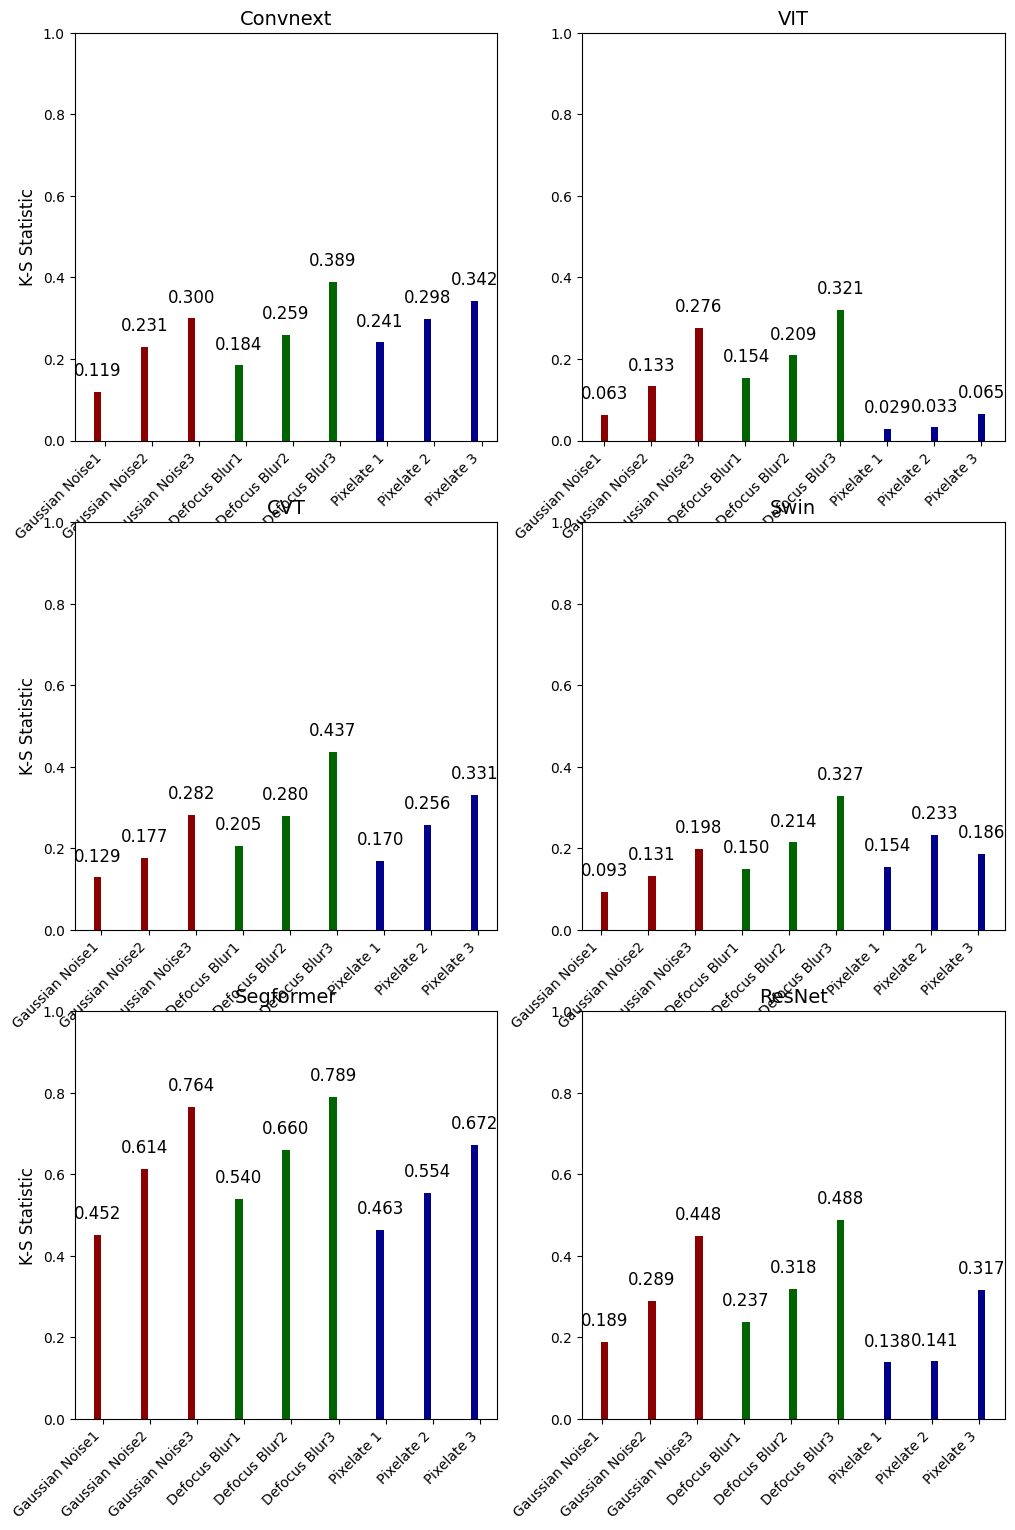

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 数据定义
data = np.array([
    [0.1195, 0.0628, 0.1285, 0.0930, 0.4518, 0.1892],
    [0.2305, 0.1330, 0.1767, 0.1314, 0.6141, 0.2891],
    [0.2998, 0.2762, 0.2820, 0.1983, 0.7644, 0.4483],
    [0.1845, 0.1543, 0.2047, 0.1499, 0.5405, 0.2374],
    [0.2592, 0.2091, 0.2797, 0.2142, 0.6598, 0.3181],
    [0.3886, 0.3205, 0.4371, 0.3274, 0.7891, 0.4882],
    [0.2410, 0.0287, 0.1697, 0.1543, 0.4632, 0.1384],
    [0.2983, 0.0325, 0.2564, 0.2329, 0.5537, 0.1413],
    [0.3421, 0.0647, 0.3307, 0.1865, 0.6716, 0.3170]
])

models = ["Convnext", "VIT", "CVT", "Swin", "Segformer", "ResNet"]
perturbations = ["Gaussian Noise1", "Gaussian Noise2", "Gaussian Noise3",
                 "Defocus Blur1", "Defocus Blur2", "Defocus Blur3",
                 "Pixelate 1", "Pixelate 2", "Pixelate 3"]
color_map = {
    "Gaussian Noise": "darkred",
    "Defocus Blur": "darkgreen",
    "Pixelate": "darkblue"
}
perturbation_types = ["Gaussian Noise", "Defocus Blur", "Pixelate"]

# 减少柱子之间的间距并且增加宽度，确保对齐
bar_width = 0.3
spacing = 0.017  # 间距调整

# 计算每个模型的柱子组的起始位置
group_width = len(models) * bar_width + (len(models) - 1) * spacing
start_positions = np.arange(len(perturbations)) * (group_width + spacing)

# 创建三行两列的子图
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# 设置字体大小
font_size = 12
title_size = 14
label_size = 12
tick_size = 10

for row, ax_row in enumerate(axes):
    for col, ax in enumerate(ax_row):
        model_index = row * 2 + col
        if model_index < len(models):
            for j, perturbation in enumerate(perturbations):
                # 确定扰动类型，并正确分配颜色
                for pt in perturbation_types:
                    if pt in perturbation:
                        perturbation_type = pt
                        break
                color = color_map.get(perturbation_type, "gray")
                # 计算每个柱子的位置
                bar_position = start_positions[j] + (bar_width + spacing) * model_index
                ax.bar(bar_position, data[j, model_index], bar_width, color=color)
                # 添加数据标签
                ax.text(bar_position, data[j, model_index] + 0.03, f'{data[j, model_index]:.3f}', 
                        ha='center', va='bottom', fontsize=font_size)
            ax.set_title(models[model_index], fontsize=title_size)

            # 根据行索引设置X轴刻度位置
            if row == 0:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 - 0.5)  # 第一行的偏移
            elif row == 1:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2)  # 第二行的偏移
            else:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 + 0.7)  # 第三行保持原样

            ax.set_xticklabels(perturbations, rotation=45, ha='right', fontsize=tick_size)
            ax.set_ylim(0, 1)  # 设置Y轴的范围
            if col == 0:
                ax.set_ylabel('K-S Statistic', fontsize=label_size)

# 添加图例
plt.figlegend([plt.Rectangle((0,0),1,1, color=color) for color in colors], perturbation_types, loc='lower center', 
              ncol=3, fontsize=label_size)

plt.tight_layout(rect=[0, 0.02, 1, 0.95])
plt.show()

# 打印出关键参数以便于手动调整
print("Bar width:", bar_width)
print("Spacing between bars:", spacing)
print("First row X-axis tick positions:", start_positions + (group_width - bar_width) / 2 - 0.5)
print("Second row X-axis tick positions:", start_positions + (group_width - bar_width) / 2)
print("Third row X-axis tick positions:", start_positions + (group_width - bar_width) / 2 + 0.7)


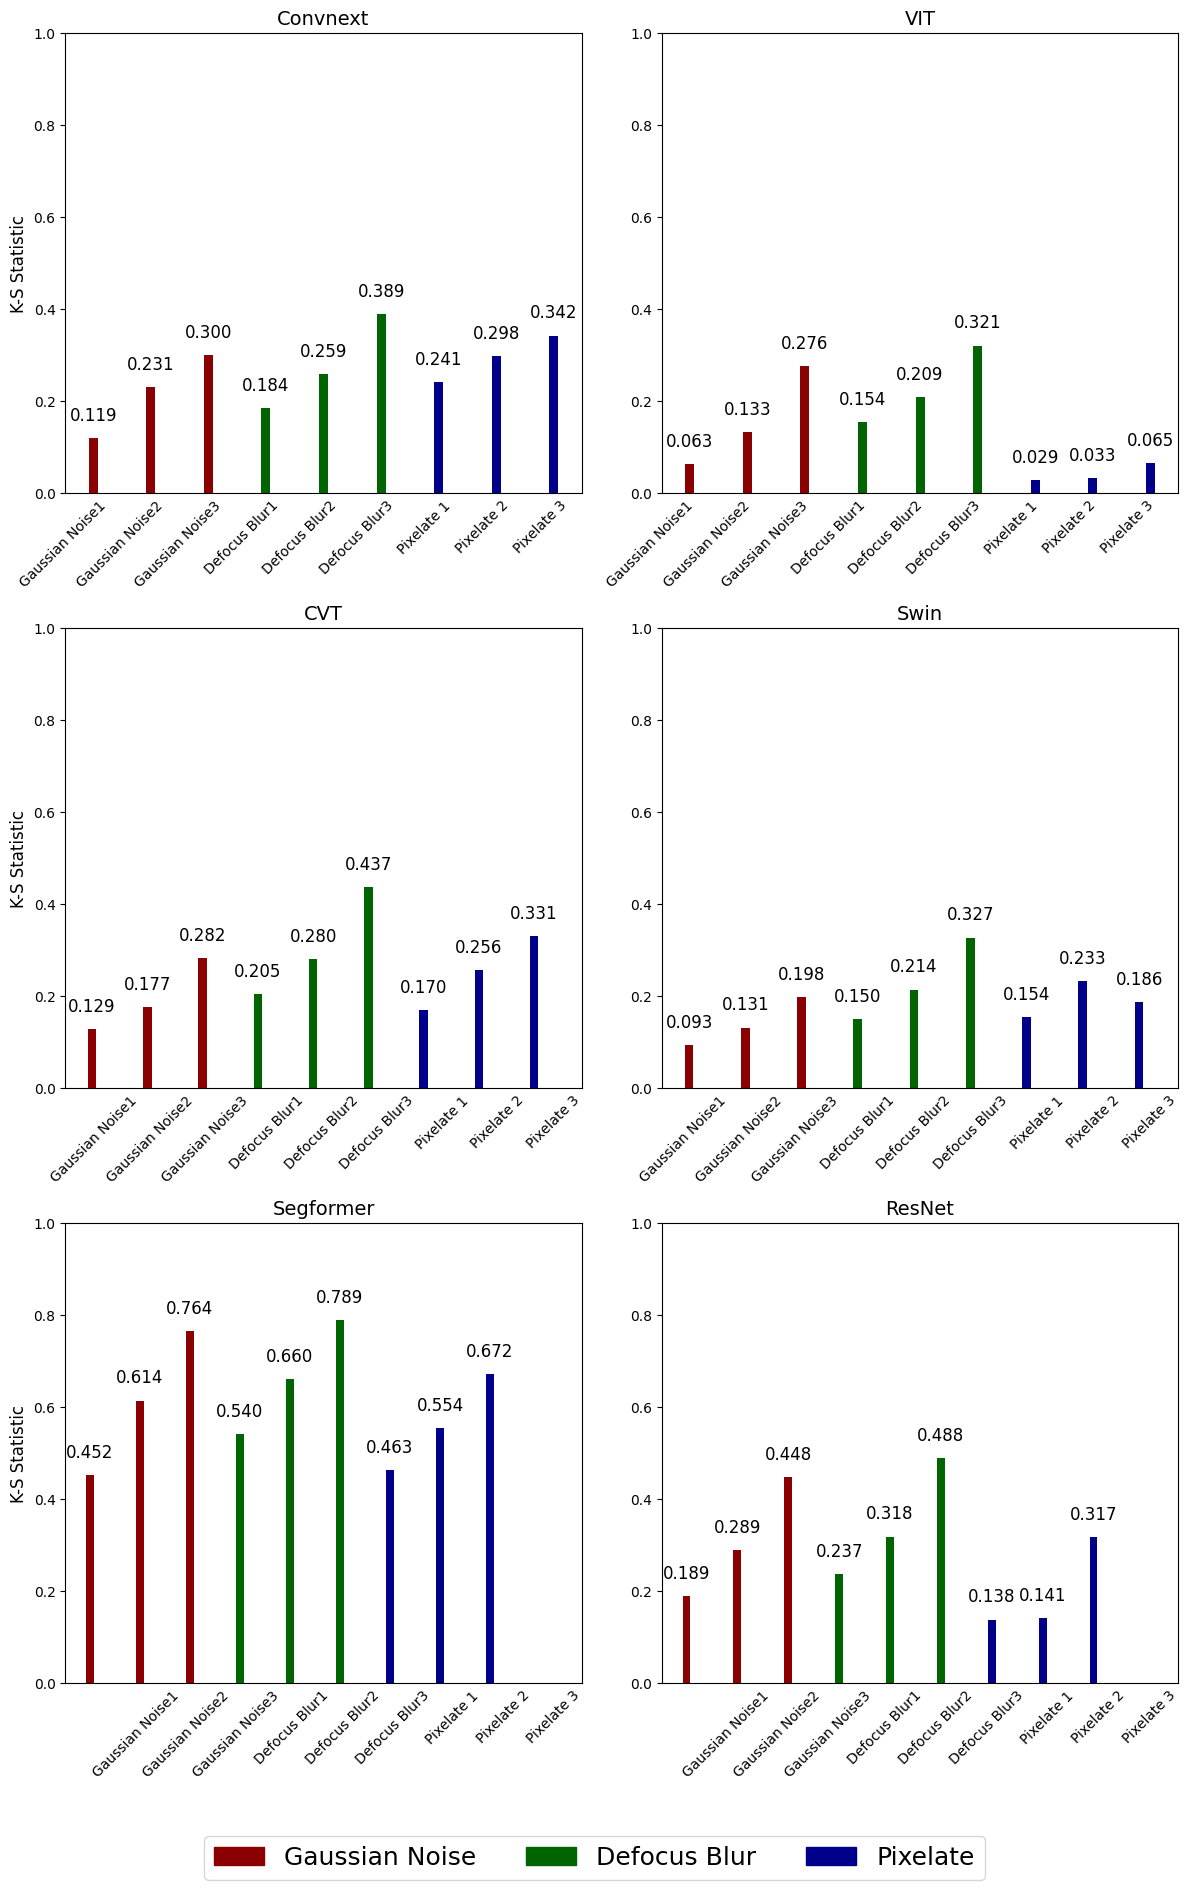

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# 数据定义
data = np.array([
    [0.1195, 0.0628, 0.1285, 0.0930, 0.4518, 0.1892],
    [0.2305, 0.1330, 0.1767, 0.1314, 0.6141, 0.2891],
    [0.2998, 0.2762, 0.2820, 0.1983, 0.7644, 0.4483],
    [0.1845, 0.1543, 0.2047, 0.1499, 0.5405, 0.2374],
    [0.2592, 0.2091, 0.2797, 0.2142, 0.6598, 0.3181],
    [0.3886, 0.3205, 0.4371, 0.3274, 0.7891, 0.4882],
    [0.2410, 0.0287, 0.1697, 0.1543, 0.4632, 0.1384],
    [0.2983, 0.0325, 0.2564, 0.2329, 0.5537, 0.1413],
    [0.3421, 0.0647, 0.3307, 0.1865, 0.6716, 0.3170]
])

models = ["Convnext", "VIT", "CVT", "Swin", "Segformer", "ResNet"]
perturbations = ["Gaussian Noise1", "Gaussian Noise2", "Gaussian Noise3",
                 "Defocus Blur1", "Defocus Blur2", "Defocus Blur3",
                 "Pixelate 1", "Pixelate 2", "Pixelate 3"]
color_map = {
    "Gaussian Noise": "darkred",
    "Defocus Blur": "darkgreen",
    "Pixelate": "darkblue"
}
perturbation_types = ["Gaussian Noise", "Defocus Blur", "Pixelate"]

# 减少柱子之间的间距并且增加宽度，确保对齐
bar_width = 0.3
spacing = 0.02  # 间距调整

# 计算每个模型的柱子组的起始位置
group_width = len(models) * bar_width + (len(models) - 1) * spacing
start_positions = np.arange(len(perturbations)) * (group_width + spacing)


# 创建三行两列的子图
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 20))  # 增加图表的垂直尺寸

# 设置字体大小
font_size = 12
title_size = 14
label_size = 12
tick_size = 10

for row, ax_row in enumerate(axes):
    for col, ax in enumerate(ax_row):
        model_index = row * 2 + col
        if model_index < len(models):
            for j, perturbation in enumerate(perturbations):
                # 确定扰动类型，并正确分配颜色
                for pt in perturbation_types:
                    if pt in perturbation:
                        perturbation_type = pt
                        break
                color = color_map.get(perturbation_type, "gray")
                # 计算每个柱子的位置
                bar_position = start_positions[j] + (bar_width + spacing) * model_index
                ax.bar(bar_position, data[j, model_index], bar_width, color=color)
                # 添加数据标签
                ax.text(bar_position, data[j, model_index] + 0.03, f'{data[j, model_index]:.3f}', 
                        ha='center', va='bottom', fontsize=font_size)
            ax.set_title(models[model_index], fontsize=title_size)

            # 根据行索引设置X轴刻度位置
            if row == 0:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 - 0.3)  # 第一行的偏移
            elif row == 1:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 +1.5)  # 第二行的偏移
            else:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 + 4)  # 第三行保持原样

            ax.set_xticklabels(perturbations, rotation=45, ha='right', fontsize=tick_size)
            ax.tick_params(axis='x', length=0)  # 去除X轴的刻度线
            ax.set_ylim(0, 1)
            if col == 0:
                ax.set_ylabel('K-S Statistic', fontsize=label_size)

# 添加图例，使用color_map中的颜色
plt.figlegend([plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()], perturbation_types, loc='lower center', 
              ncol=3, fontsize=18)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # 调整上下间距
plt.show()


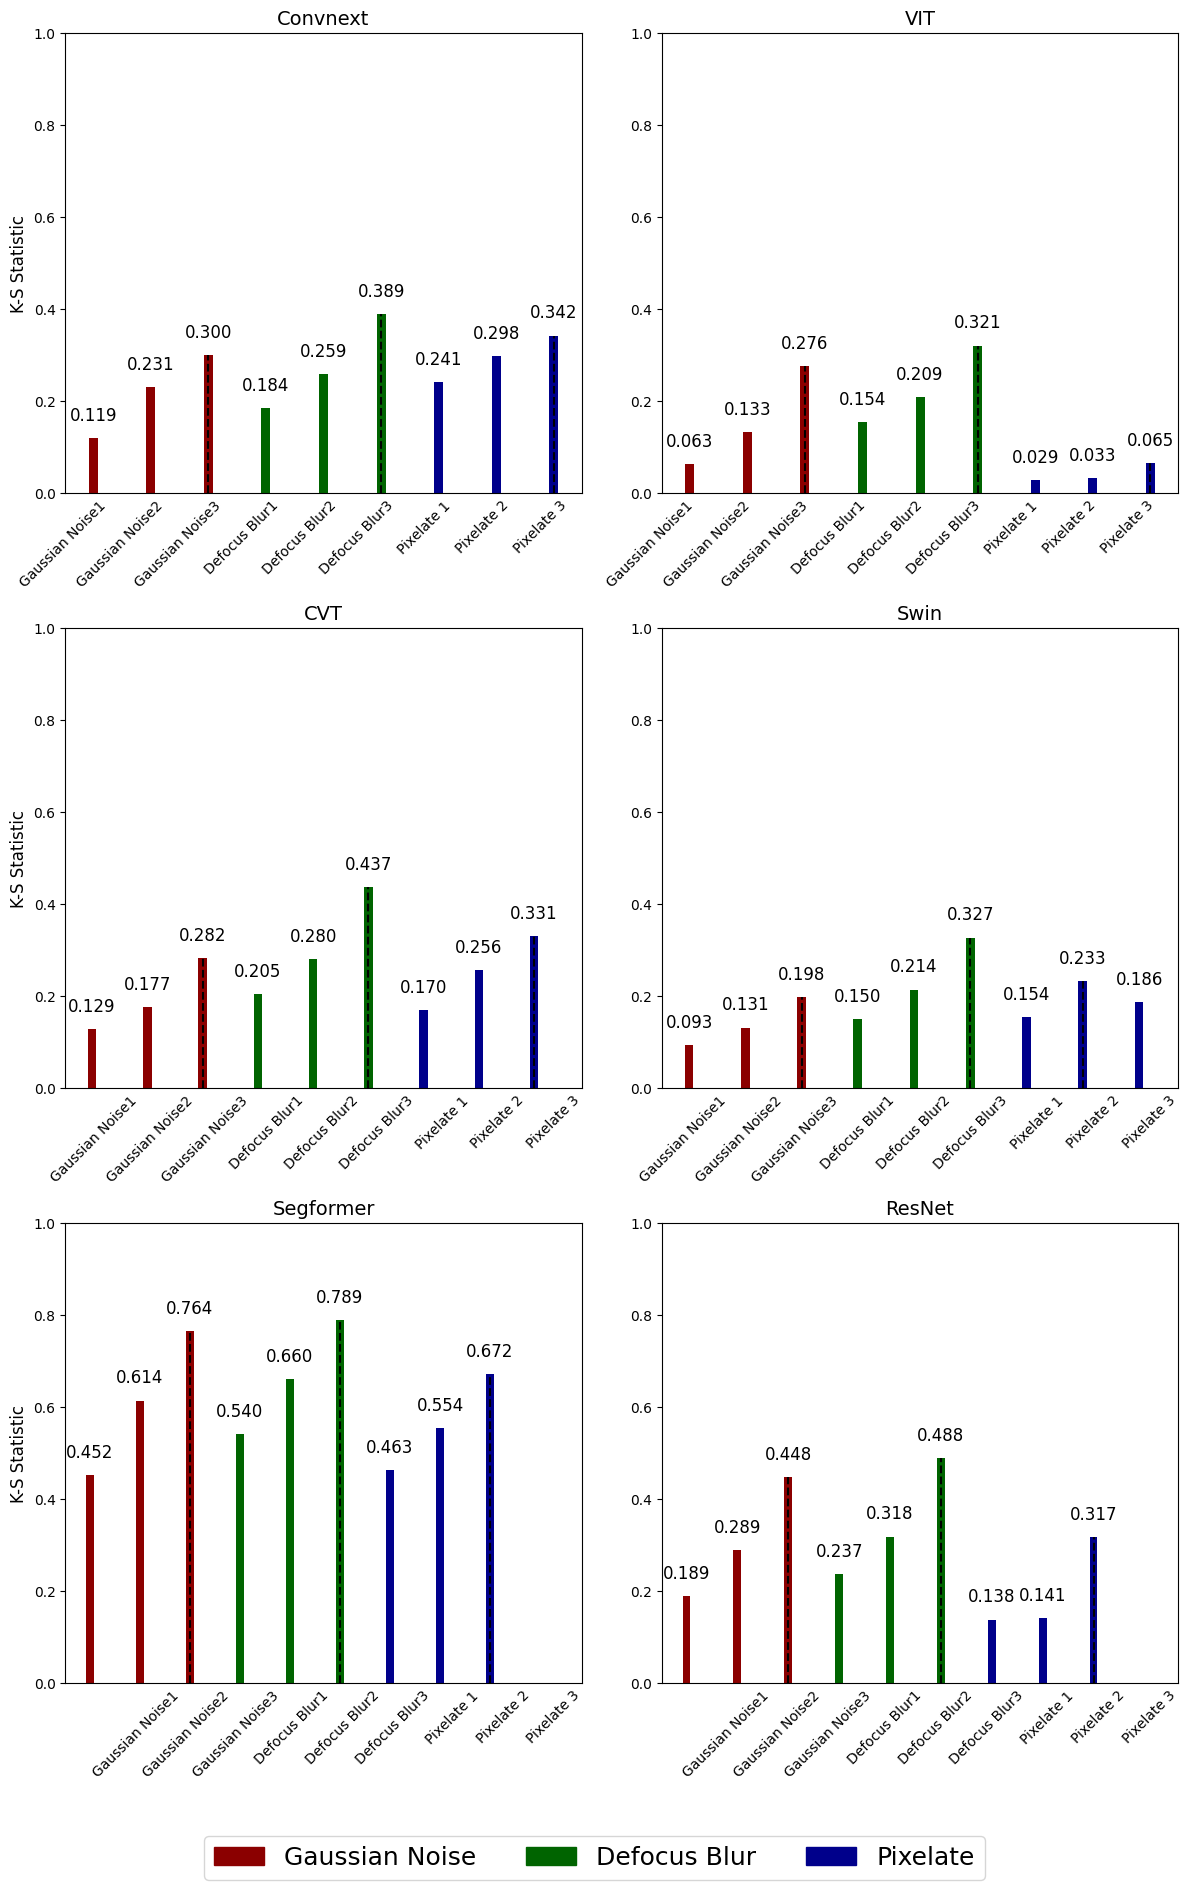

In [6]:
# 绘制每组柱子中最高点的辅助线

# 创建三行两列的子图
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 20))  # 增加图表的垂直尺寸

# 设置字体大小
font_size = 12
title_size = 14
label_size = 12
tick_size = 10

for row, ax_row in enumerate(axes):
    for col, ax in enumerate(ax_row):
        model_index = row * 2 + col
        if model_index < len(models):
            max_values = []  # 存储每组柱子的最高值
            max_positions = []  # 存储最高值对应的位置
            for j, perturbation in enumerate(perturbations):
                # 确定扰动类型，并正确分配颜色
                for pt in perturbation_types:
                    if pt in perturbation:
                        perturbation_type = pt
                        break
                color = color_map.get(perturbation_type, "gray")
                # 计算每个柱子的位置
                bar_position = start_positions[j] + (bar_width + spacing) * model_index
                bar = ax.bar(bar_position, data[j, model_index], bar_width, color=color)
                # 添加数据标签
                ax.text(bar_position, data[j, model_index] + 0.03, f'{data[j, model_index]:.3f}', 
                        ha='center', va='bottom', fontsize=font_size)
                # 存储最高值及其位置
                max_values.append(data[j, model_index])
                max_positions.append(bar_position)

            # 绘制辅助线
            for i in range(0, len(max_values), 3):
                max_val = max(max_values[i:i+3])
                max_pos = max_positions[max_values.index(max_val)]
                ax.plot([max_pos, max_pos], [0, max_val], color="black", linestyle="--")

            ax.set_title(models[model_index], fontsize=title_size)

            if row == 0:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 - 0.3)  # 第一行的偏移
            elif row == 1:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 +1.5)  # 第二行的偏移
            else:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 + 4)  # 第三行保持原样

            ax.set_xticklabels(perturbations, rotation=45, ha='right', fontsize=tick_size)
            ax.tick_params(axis='x', length=0)  # 去除X轴的刻度线
            ax.set_ylim(0, 1)
            if col == 0:
                ax.set_ylabel('K-S Statistic', fontsize=label_size)

# 添加图例，使用color_map中的颜色
plt.figlegend([plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()], perturbation_types, loc='lower center', 
              ncol=3, fontsize=18)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # 调整上下间距
plt.show()



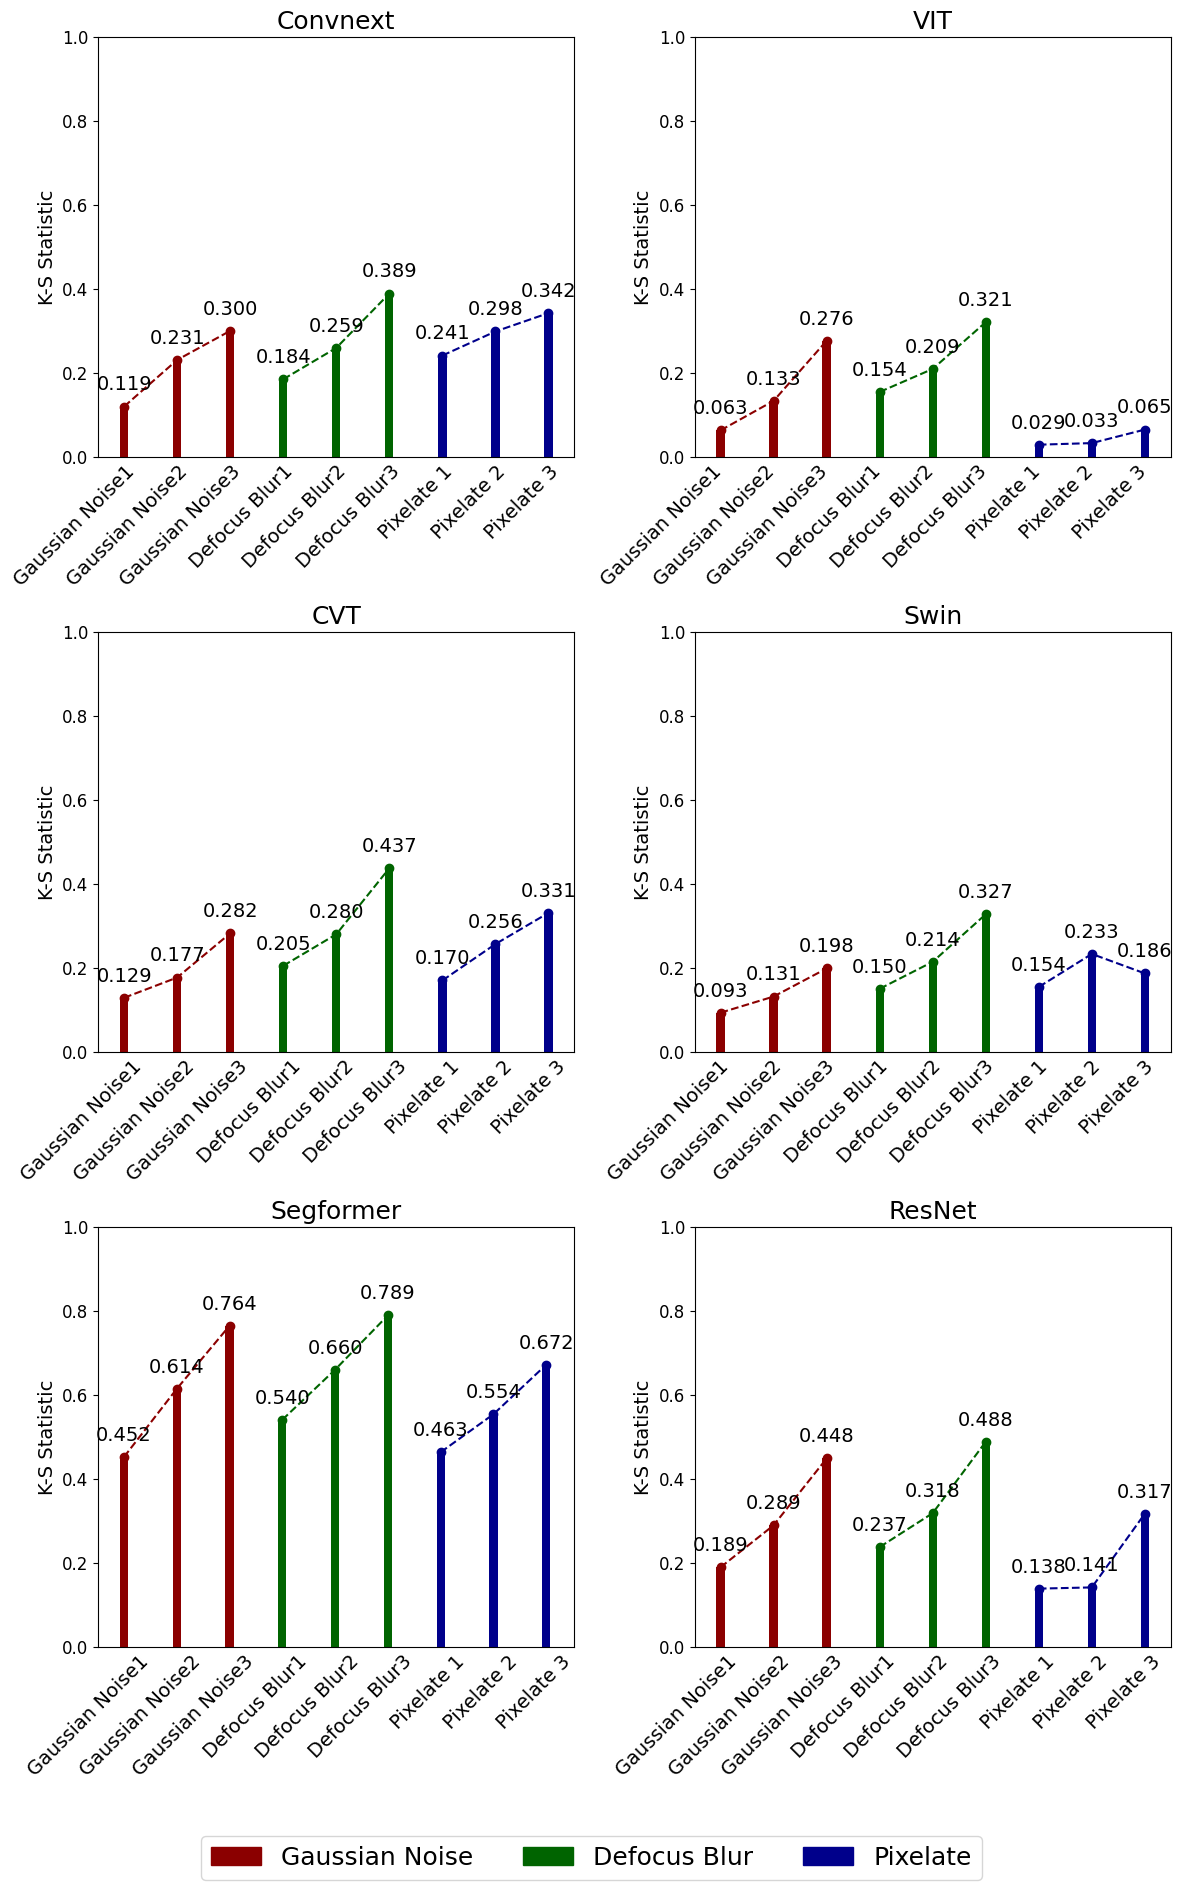

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 数据定义
data = np.array([
    [0.1195, 0.0628, 0.1285, 0.0930, 0.4518, 0.1892],
    [0.2305, 0.1330, 0.1767, 0.1314, 0.6141, 0.2891],
    [0.2998, 0.2762, 0.2820, 0.1983, 0.7644, 0.4483],
    [0.1845, 0.1543, 0.2047, 0.1499, 0.5405, 0.2374],
    [0.2592, 0.2091, 0.2797, 0.2142, 0.6598, 0.3181],
    [0.3886, 0.3205, 0.4371, 0.3274, 0.7891, 0.4882],
    [0.2410, 0.0287, 0.1697, 0.1543, 0.4632, 0.1384],
    [0.2983, 0.0325, 0.2564, 0.2329, 0.5537, 0.1413],
    [0.3421, 0.0647, 0.3307, 0.1865, 0.6716, 0.3170]
])

models = ["Convnext", "VIT", "CVT", "Swin", "Segformer", "ResNet"]
perturbations = ["Gaussian Noise1", "Gaussian Noise2", "Gaussian Noise3",
                 "Defocus Blur1", "Defocus Blur2", "Defocus Blur3",
                 "Pixelate 1", "Pixelate 2", "Pixelate 3"]
color_map = {
    "Gaussian Noise": "darkred",
    "Defocus Blur": "darkgreen",
    "Pixelate": "darkblue"
}
perturbation_types = ["Gaussian Noise", "Defocus Blur", "Pixelate"]

# 减少柱子之间的间距并且增加宽度，确保对齐
bar_width = 0.3
spacing = 0.02  # 间距调整

# 计算每个模型的柱子组的起始位置
group_width = len(models) * bar_width + (len(models) - 1) * spacing
start_positions = np.arange(len(perturbations)) * (group_width + spacing)


# 创建三行两列的子图
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 20))  # 增加图表的垂直尺寸

# 设置字体大小
font_size = 14
title_size = 18
label_size = 14
tick_size = 14

for row, ax_row in enumerate(axes):
    for col, ax in enumerate(ax_row):
        model_index = row * 2 + col
        if model_index < len(models):
            # 每种扰动类型的值和位置
            perturbation_values = {pt: [] for pt in perturbation_types}
            perturbation_positions = {pt: [] for pt in perturbation_types}

            for j, perturbation in enumerate(perturbations):
                # 确定扰动类型，并正确分配颜色
                for pt in perturbation_types:
                    if pt in perturbation:
                        perturbation_type = pt
                        break
                color = color_map.get(perturbation_type, "gray")
                # 计算每个柱子的位置
                bar_position = start_positions[j] + (bar_width + spacing) * model_index
                ax.bar(bar_position, data[j, model_index], bar_width, color=color)
                # 添加数据标签
                ax.text(bar_position, data[j, model_index] + 0.03, f'{data[j, model_index]:.3f}', 
                        ha='center', va='bottom', fontsize=font_size)

                # 存储每种扰动类型的值和位置
                perturbation_values[perturbation_type].append(data[j, model_index])
                perturbation_positions[perturbation_type].append(bar_position)

            # 为每种扰动类型绘制点线图
            for pt in perturbation_types:
                ax.plot(perturbation_positions[pt], perturbation_values[pt], color=color_map.get(pt), marker='o', linestyle='--')

            ax.set_title(models[model_index], fontsize=title_size)

            if row == 0:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 - 0.3)  # 第一行的偏移
            elif row == 1:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 +0.6)  # 第二行的偏移
            else:
                ax.set_xticks(start_positions + (group_width - bar_width) / 2 +1.5)  # 第三行保持原样

            # ax.set_xticklabels(perturbations, rotation=45, ha='right', fontsize=tick_size)
            # ax.tick_params(axis='x', length=0)  # 去除X轴的刻度线
            # ax.set_ylim(0, 1)
            # # if col == 0:
            # ax.set_ylabel('K-S Statistic', fontsize=label_size)
            ax.set_xticklabels(perturbations, rotation=45, ha='right', fontsize=tick_size)
            ax.tick_params(axis='x', length=0)  # Remove the tick lines on the X-axis
            ax.set_ylim(0, 1)

            # Set the font size for the Y-tick labels
            y_tick_size = 12  # You can adjust this value as needed
            ax.tick_params(axis='y', labelsize=y_tick_size)

            ax.set_ylabel('K-S Statistic', fontsize=label_size)


# 添加图例，使用color_map中的颜色
plt.figlegend([plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()], perturbation_types, loc='lower center', 
              ncol=3, fontsize=18)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # 调整上下间距
plt.show()



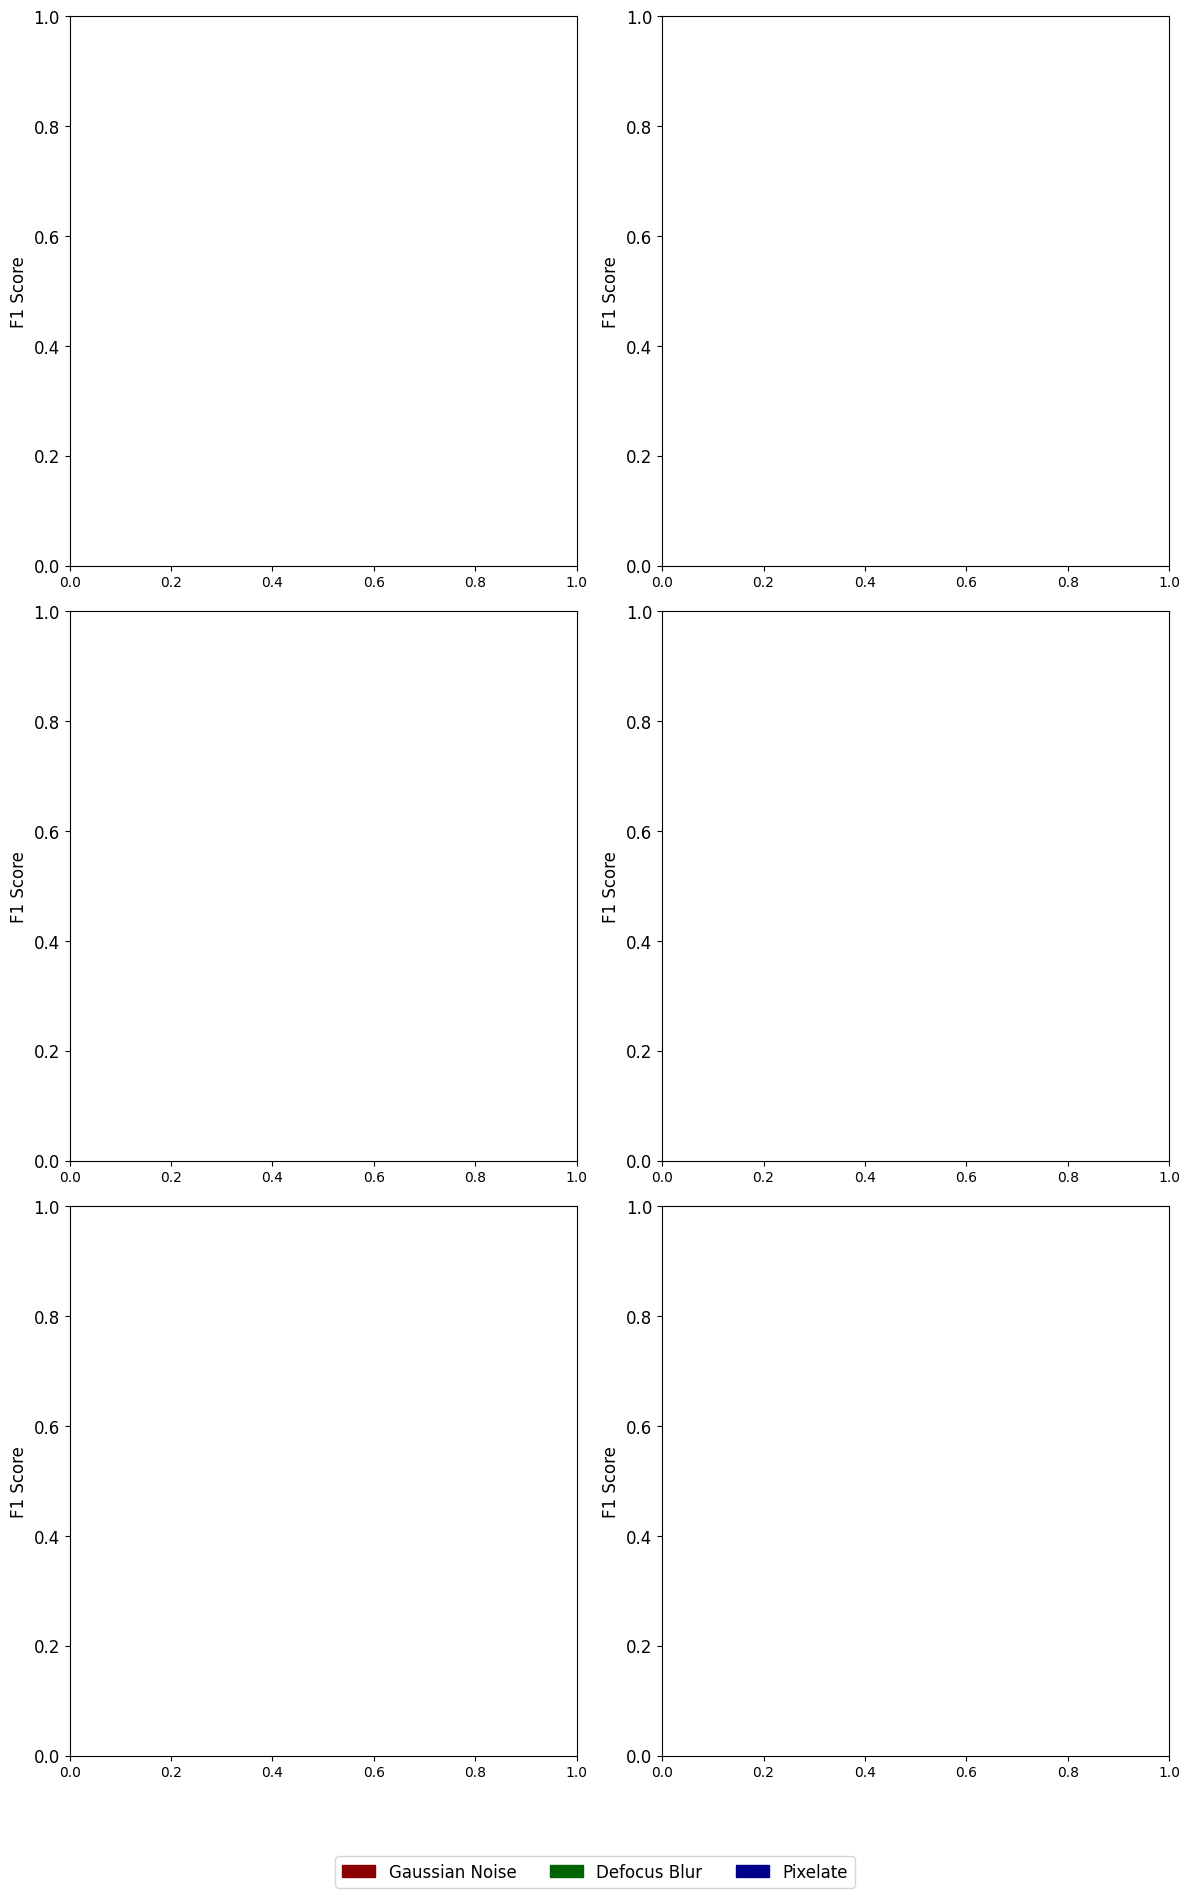

In [8]:
perturbation_types = ["Gaussian Noise", "Defocus Blur", "Pixelate"]

# 进一步增加柱子宽度
bar_width = 0.5  # 进一步增加柱子宽度
spacing = 0.1   # 进一步增加柱子之间的间距

# 计算每个模型的柱子组的起始位置
group_width = len(models) * bar_width + (len(models) - 1) * spacing
start_positions = np.arange(len(perturbations)) * (group_width + spacing)

# 创建子图
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 20))

# 设置字体大小
font_size = 12
title_size = 14
label_size = 12
tick_size = 12

for row, ax_row in enumerate(axes):
    for col, ax in enumerate(ax_row):
        model_index = row * 2 + col
        if model_index < len(models):
            # 同前面代码...

            # 增加y轴刻度字号
            ax.set_ylabel('F1 Score', fontsize=label_size)
            ax.tick_params(axis='y', labelsize=12)

# 添加图例
plt.figlegend([plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()], perturbation_types, loc='lower center', 
              ncol=3, fontsize=label_size)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()